# Graficas ejecución de escenarios para el Algoritmo Genético

In [1]:
%matplotlib notebook

In [2]:
import os
import glob
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sklearn.metrics as metrics
import scripts.funciones as funciones

## Probabilidad de mutacion

In [ ]:
with open('data/output/resultado_escenario1_Mutacion.json') as json_file:
    mut1 = json.load(json_file)
    
with open('data/output/resultado_escenario2_Mutacion.json') as json_file:
    mut2 = json.load(json_file)
    
with open('data/output/resultado_escenario3_Mutacion.json') as json_file:
    mut3 = json.load(json_file)

In [ ]:
plt.figure('Probabilidad de Mutacion VS ROC-AUC (Validacion)', figsize=(10,5))
plt.plot(mut1['prob_mutacion'],mut1['best_scores'], label = 'hola')
plt.plot(mut2['prob_mutacion'],mut2['best_scores'])
plt.plot(mut3['prob_mutacion'],mut3['best_scores'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Probabilidad de mutacion')
plt.ylabel('ROC-AUC')

In [ ]:
plt.figure('Probabilidad de Mutacion VS Tiempo Computo', figsize=(10,5))
plt.plot(mut1['prob_mutacion'],mut1['tiempo'], label = 'hola')
plt.plot(mut2['prob_mutacion'],mut2['tiempo'])
plt.plot(mut3['prob_mutacion'],mut3['tiempo'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Probabilidad de mutacion')
plt.ylabel('Tiempo computo (mins)')

## Porcentaje de poblacion a conservar por iteracion

In [ ]:
with open('data/output/resultado_escenario1_Seleccion.json') as json_file:
    pob1 = json.load(json_file)
    
with open('data/output/resultado_escenario2_Seleccion.json') as json_file:
    pob2 = json.load(json_file)
    
with open('data/output/resultado_escenario3_Seleccion.json') as json_file:
    pob3 = json.load(json_file)

In [ ]:
plt.figure('Porcentaje de poblacion a conservar VS ROC-AUC (Validacion)', figsize=(10,5))
plt.plot(pob1['prob_seleccion'],pob1['best_Scores'], label = 'hola')
plt.plot(pob2['prob_seleccion'],pob2['best_Scores'])
plt.plot(pob3['prob_seleccion'],pob3['best_Scores'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Porcentaje de poblacion a conservar por iteracion')
plt.ylabel('ROC-AUC')

In [ ]:
plt.figure('Porcentaje de poblacion a conservar VS Tiempo Computo', figsize=(10,5))
plt.plot(pob1['prob_seleccion'],pob1['tiempo'], label = 'hola')
plt.plot(pob2['prob_seleccion'],pob2['tiempo'])
plt.plot(pob3['prob_seleccion'],pob3['tiempo'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Porcentaje de poblacion a conservar')
plt.ylabel('Tiempo computo (mins)')

# Obtencion de desempeno de modelos

In [17]:
train = pd.read_csv("data/train_z.csv").drop(columns=["TW", "BARRIO"])
validation = pd.read_csv("data/validation_z.csv").drop(columns=["TW", "BARRIO"])
test = pd.read_csv("data/test_z.csv").drop(columns=["TW", "BARRIO"])

# Divide conjunto de datos en entrenamiento y en prueba
X_train = train.drop(columns="Accidente")
Y_train = train["Accidente"]

X_val = validation.drop(columns="Accidente")
Y_val = validation["Accidente"]

X_test = test.drop(columns="Accidente")
Y_test = test["Accidente"]

### Modelo seleccionado mirando probabilidad de mutacion

In [ ]:
### probabilidad de mutacion 0.3 del escenario 1
with open('data/output/Escenario 1/mutacion/output_1_2_2020-08-30_17_26_18_probMutacion.json') as json_file:
    res1 = json.load(json_file)
    
print(f"Best fitness: {res1['best_score']}")
print(f"Tiempo de computo: {round(res1['execution_time_mins']/60,2)} mins")
print(f"Best solucion: {res1['best_mod']}")    

In [ ]:
### Evolucion del metodo vs numero de generaciones
plt.figure('Numero de generaciones VS ROC-AUC (validacion)', figsize=(10,5))
plt.plot(range(res1['num_generaciones']+1),res1['history'])
plt.xlabel('Numero de generaciones')
plt.ylabel('ROC-AUC')

In [ ]:
### Evaluacion del modelo
best_mod1, score = funciones.entrenar_NN(X_train, Y_train, X_val, Y_val, 3, res1['best_mod'])

In [ ]:
### Validation
preds1v = best_mod1.predict(X_val)
proba1v = best_mod1.predict_proba(X_val)[:, 1]

pr_auc1v = funciones.precision_recall_auc_score(Y_val, proba1v)
roc_auc1v = metrics.roc_auc_score(Y_val, proba1v)
precision1v = metrics.precision_score(Y_val, preds1v)
recall1v = metrics.recall_score(Y_val, preds1v)
fscore1v = metrics.f1_score(Y_val, preds1v)
print('VALIDACION')
print(f'PR-AUC:{pr_auc1v}')
print(f'ROC-AUC:{roc_auc1v}')
print(f'Precision-AUC:{precision1v}')
print(f'Recall-AUC:{recall1v}')
print(f'FScore-AUC:{fscore1v}')

print('**'*20)
### Test
preds1 = best_mod1.predict(X_test)
proba1 = best_mod1.predict_proba(X_test)[:, 1]

pr_auc1 = funciones.precision_recall_auc_score(Y_test, proba1)
roc_auc1 = metrics.roc_auc_score(Y_test, proba1)
precision1 = metrics.precision_score(Y_test, preds1)
recall1 = metrics.recall_score(Y_test, preds1)
fscore1 = metrics.f1_score(Y_test, preds1)
print('TEST')
print(f'PR-AUC:{pr_auc1}')
print(f'ROC-AUC:{roc_auc1}')
print(f'Precision-AUC:{precision1}')
print(f'Recall-AUC:{recall1}')
print(f'FScore-AUC:{fscore1}')

### Modelo seleccionando mirando proporcion a conservar de la poblacion cada iteracion

In [ ]:
### porcentaje a conservar de 0.2 del escenario 3
with open('data/output/Escenario 3/seleccion/output_3_1_2020-08-28_20_23_32_probSeleccion.json') as json_file:
    res2 = json.load(json_file)
    
print(f"Best fitness: {res2['best_score']}")
print(f"Tiempo de computo: {round(res2['execution_time_mins']/60,2)} mins")
print(f"Best solucion: {res2['best_mod']}")    

In [ ]:
### Evolucion del metodo vs porcentaje a conservar de poblacion
plt.figure('Porcentaje a conservar VS ROC-AUC (validacion)', figsize=(10,5))
plt.plot(range(res2['num_generaciones']+1),res2['history'])
plt.xlabel('Numero de generaciones')
plt.ylabel('ROC-AUC')

In [ ]:
### Evaluacion del modelo
best_mod2, score = funciones.entrenar_NN(X_train, Y_train, X_val, Y_val, 3, res2['best_mod'])

In [ ]:
### Validation
preds2v = best_mod2.predict(X_val)
proba2v = best_mod2.predict_proba(X_val)[:, 1]

pr_auc2v = funciones.precision_recall_auc_score(Y_val, proba2v)
roc_auc2v = metrics.roc_auc_score(Y_val, proba2v)
precision2v = metrics.precision_score(Y_val, preds2v)
recall2v = metrics.recall_score(Y_val, preds2v)
fscore2v = metrics.f1_score(Y_val, preds2v)
print('VALIDACION')
print(f'PR-AUC:{pr_auc2v}')
print(f'ROC-AUC:{roc_auc2v}')
print(f'Precision-AUC:{precision2v}')
print(f'Recall-AUC:{recall2v}')
print(f'FScore-AUC:{fscore2v}')

print('**'*20)
### Test
preds2 = best_mod2.predict(X_test)
proba2 = best_mod2.predict_proba(X_test)[:, 1]

pr_auc2 = funciones.precision_recall_auc_score(Y_test, proba2)
roc_auc2 = metrics.roc_auc_score(Y_test, proba2)
precision2 = metrics.precision_score(Y_test, preds2)
recall2 = metrics.recall_score(Y_test, preds2)
fscore2 = metrics.f1_score(Y_test, preds2)
print('TEST')
print(f'PR-AUC:{pr_auc2}')
print(f'ROC-AUC:{roc_auc2}')
print(f'Precision-AUC:{precision2}')
print(f'Recall-AUC:{recall2}')
print(f'FScore-AUC:{fscore2}')

# Graficos para el trabajo 3

In [4]:
### Modelo seleccionado del trabajo 1
### probabilidad de mutacion 0.3 del escenario 1
with open('data/output/Escenario 1/mutacion/output_1_2_2020-08-30_17_26_18_probMutacion.json') as json_file:
    sel = json.load(json_file)
    
print(f"Best fitness: {sel['best_score']}")
print(f"Tiempo de computo: {round(sel['execution_time_mins']/60,2)} mins")
print(f"Best solucion: {sel['best_mod']}")

Best fitness: 0.785376326734016
Tiempo de computo: 773.03 mins
Best solucion: {'layer_sizes': [19, 114, 62], 'activation': 'tanh', 'alpha': 1.3422882364300124, 'learning_rate_init': 0.001, 'fitness': 0.785376326734016}


In [6]:
### Resultado con BH
with open('data/output/Trabajo 3/resultado_BH.json') as json_file:
    bh = json.load(json_file)
    
print(f"Best fitness: {bh['best_Scores']}")
print(f"Tiempo de computo: {round(bh['tiempo']/60,2)} mins")
print(f"Best solucion: {bh['mod']}")

Best fitness: 0.7840247835586587
Tiempo de computo: 6.37 mins
Best solucion: {'layer_sizes': [19, 114, 110], 'activation': 'identity', 'alpha': 1.2774084876949148, 'learning_rate_init': 0.022013225747051824, 'fitness': 0.7840247835586587, 'alpha_bin': '[]', 'learning_rate_init_bin': '[]'}


In [8]:
### Resultado con LS RB1
with open('data/output/Trabajo 3/resultado_dosDirecciones.json') as json_file:
    ls = json.load(json_file)
    
print(f"Best fitness: {ls['best_Scores']}")
print(f"Tiempo de computo: {round(ls['tiempo']/60,2)} mins")
print(f"Best solucion: {ls['mod']}")

Best fitness: 0.7832074943881477
Tiempo de computo: 6.83 mins
Best solucion: {'layer_sizes': [42, 62], 'activation': 'relu', 'alpha': 0.00018350867149338103, 'learning_rate_init': 0.0010554300392555654, 'fitness': 0.7832074943881477, 'learning_rate_init_bin': '[]', 'alpha_bin': '[]'}


In [10]:
### Resultado con LS RB2 25
with open('data/output/Trabajo 3/resultado_PotenciaV25.json') as json_file:
    ls2 = json.load(json_file)
    
print(f"Best fitness: {ls2['best_Scores']}")
print(f"Tiempo de computo: {round(ls2['tiempo']/60,2)} mins")
print(f"Best solucion: {ls2['mod']}")

Best fitness: 0.7827576371711967
Tiempo de computo: 6.5 mins
Best solucion: {'layer_sizes': [7, 72, 127, 36], 'activation': 'identity', 'alpha': 0.002410888671875, 'alpha_bin': '[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]', 'learning_rate_init': 0.2264404296875, 'learning_rate_init_bin': '[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]', 'fitness': 0.7827576371711967}


In [11]:
### Resultado con LS RB2 64
with open('data/output/Trabajo 3/resultado_PotenciaV64.json') as json_file:
    ls3 = json.load(json_file)
    
print(f"Best fitness: {ls3['best_Scores']}")
print(f"Tiempo de computo: {round(ls3['tiempo']/60,2)} mins")
print(f"Best solucion: {ls3['mod']}")

Best fitness: 0.7834814488867607
Tiempo de computo: 6.98 mins
Best solucion: {'layer_sizes': [20, 81, 127], 'activation': 'identity', 'alpha': 0.002899169921875, 'alpha_bin': '[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]', 'learning_rate_init': 0.1861572265625, 'learning_rate_init_bin': '[0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]', 'fitness': 0.7834814488867607}


In [12]:
h_sel = sel['history']
h_bh = bh['historia']
h_ls = ls['historia']
h_ls2 = ls2['historia']
h_ls3 = ls3['historia']

<IPython.core.display.Javascript object>


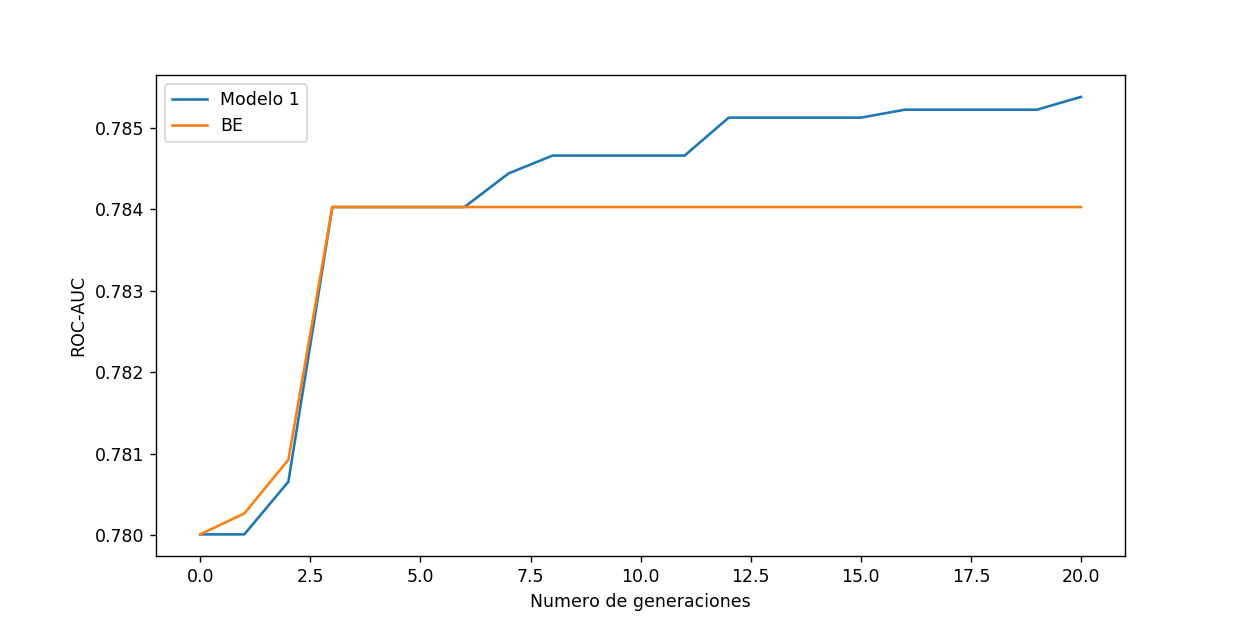

Text(0, 0.5, 'ROC-AUC')

In [30]:
### Evolucion del metodo vs numero de generaciones
plt.figure('Numero de generaciones VS ROC-AUC (validacion) BE', figsize=(10,5))
plt.plot(range(sel['num_generaciones']+1),h_sel)
plt.plot(range(sel['num_generaciones']+1),h_bh)
plt.legend(['Modelo 1','BE'])
plt.xlabel('Numero de generaciones')
plt.ylabel('ROC-AUC')

<IPython.core.display.Javascript object>


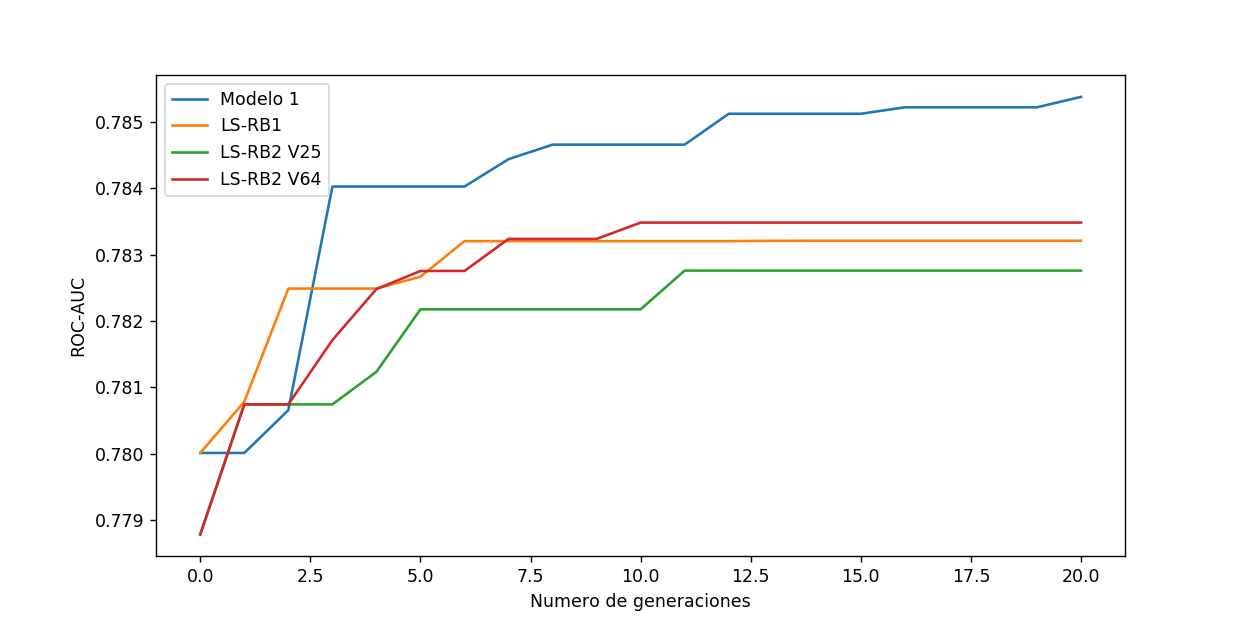

Text(0, 0.5, 'ROC-AUC')

In [31]:
### Evolucion del metodo vs numero de generaciones
plt.figure('Numero de generaciones VS ROC-AUC (validacion) LS', figsize=(10,5))
plt.plot(range(sel['num_generaciones']+1),h_sel)
plt.plot(range(sel['num_generaciones']+1),h_ls)
plt.plot(range(sel['num_generaciones']+1),h_ls2)
plt.plot(range(sel['num_generaciones']+1),h_ls3)
plt.legend(['Modelo 1','LS-RB1', 'LS-RB2 V25', 'LS-RB2 V64'])
plt.xlabel('Numero de generaciones')
plt.ylabel('ROC-AUC')

In [32]:
41/50

0.82